# Infinite Impulse Response-Filters (IIR)  <img src='data/images/logo.png' width=50 align='left'> 

author: Thomas Haslwanter \
date: June-2020

In contrast to FIR-filters, IIR-filters can also include a *feedback* from the output to the input:

<img src='data/images/IIR_filter.jpg' width=500>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

impulse = np.zeros(50)
impulse[10] = 1

## Example 1: Impulse-Filtering

As the name implies, an impulse input to an IIR-filter can have an arbitrarily long effect on the output. For example, take the filter:

\begin{equation}
    y_i = x_i + \frac{y_{i-1}}{2}
\end{equation}

In [22]:
a = [1, -0.5]
b = [1]
impFiltered = signal.lfilter(b,a,impulse)

Text(0, 0.5, 'Log ()')

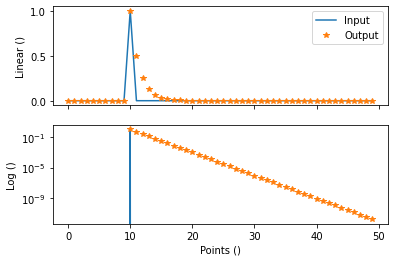

In [33]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(impulse)
axs[0].plot(impFiltered,'*')
axs[0].legend(['Input', 'Output'])
axs[0].set_ylabel('Linear ()')

axs[1].semilogy(impulse)
axs[1].semilogy(impFiltered, '*')
axs[1].set_xlabel('Points ()')
axs[1].set_ylabel('Log ()')

As you see in the *semilogy* output, the output gradually decreases - but goes on infinitely.

## Example 2:  Lowpass

A filter-type frequently used for bandpass-filtering are *Butterworth* filters.
The *Butterworth-filter* is also called a *maximally flat* filter because it minimized transient artefacts in the filtered data.

Butterworth filter can be *low-pass*, *high-pass*, or *band-pass*. Below a *bandpass* example.
First, we demonstrate a low-pass filter:

### Sample-data

Text(0, 0.5, 'Signal')

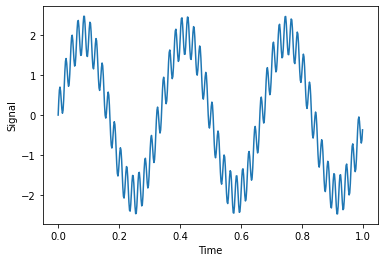

In [52]:
rate = 500
t = np.arange(0,1,1/rate)
freqs = [3, 50]
amps = [2, 0.5]
x = np.zeros(t.shape)
for freq, amp in zip(freqs,amps):
    x += amp * np.sin(2*np.pi*freq*t)
    
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('Signal')

### Filter Characteristics

In [53]:
# Filter coefficients
from scipy import signal
Nyq = rate/2
cutoff = 10
b,a = signal.butter(4, cutoff/Nyq)

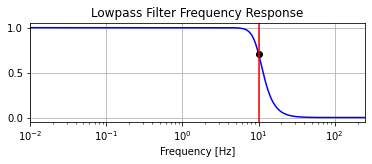

In [54]:
# Plot the frequency response.
w, h = signal.freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*rate*w/np.pi, np.abs(h), 'b')
plt.semilogx(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='r')
plt.xlim(1e-2, 0.5*rate)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

### Filtered Signal

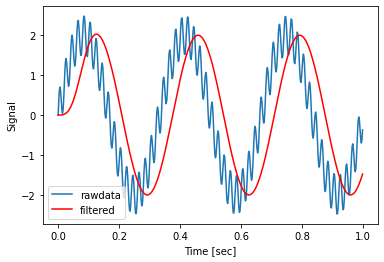

In [6]:
# Apply the filter to the noisy data
filtered = signal.lfilter(b,a,x)

plt.plot(t,x, label='rawdata')
plt.plot(t,filtered, 'r', label='filtered')
plt.xlabel('Time [sec]')\

plt.ylabel('Signal')
plt.legend()

## Example 3: "filtfilt" - Lowpass, without delay

As you can see in the example above, *lfilter* induces a delay. For offline data analysis, this can be eliminated, by filtering the data twice: once forward, and once backward. This eliminates the delay, *but doubles the order of the filter*!

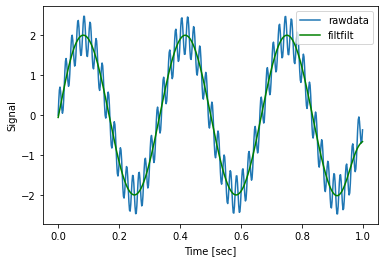

In [7]:
ffiltered = signal.filtfilt(b,a,x)

plt.plot(t,x, label='rawdata')
plt.plot(t,ffiltered, 'g', label='filtfilt')
plt.xlabel('Time [sec]')\

plt.ylabel('Signal')
plt.legend()

## Example 4: Bandpass

For this, we first add a third frequency

Our sample signal consists of three different frequencies. A bandpass, which contains only the middle frequency, should eliminate the upper an the lower frequency:

In [55]:
rate = 10
amps = np.r_[0.5, 1, 0.4]
freqs = np.c_[[0.05, 0.3, 3]]
omega = 2*np.pi * freqs

t = np.arange(0, 40, 1/rate)
x = amps @ np.sin(omega*t)

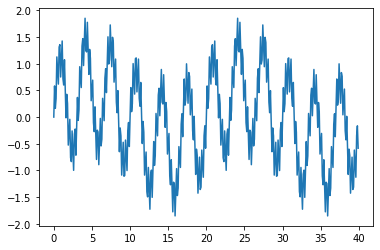

In [56]:
plt.plot(t,x)

In [57]:
# Butterworth filter
nyq = rate/2       # [Hz]
order = 5
band = np.r_[0.2, 1]    # [Hz]

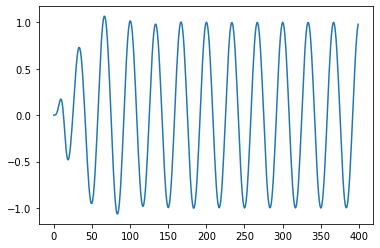

In [58]:
(b_band, a_band) = signal.butter(5, band/nyq, btype='bandpass')
filtered = signal.lfilter(b_band, a_band, x)
plt.plot(filtered)

## WARNING: Numerical Problems

For higher frequencies, numerical problems can arise:

In [66]:
# Same as above, only with a higher sampling rate
rate = 1000
nyq = rate/2

t = np.arange(0, 40, 1/rate)
x = amps @ np.sin(omega*t)

### Still working
If low-pass and high-pass are split into two different filters,
the result is still correct:

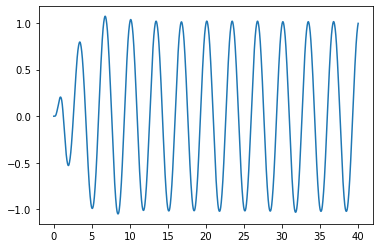

In [68]:
(b_low, a_low) = signal.butter(5, band[1]/nyq, btype='low')
(b_high, a_high) = signal.butter(5, band[0]/nyq, btype='high')

low_filtered = signal.lfilter(b_low, a_low, x)
band_filtered = signal.lfilter(b_high, a_high, low_filtered)
plt.plot(t, band_filtered)

### Failing
The "a/b format" bandpass fails

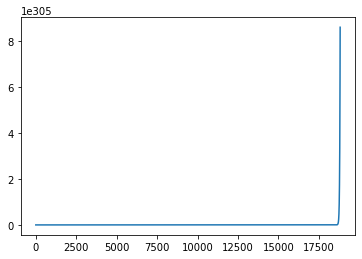

In [70]:
(b_band, a_band) = signal.butter(5, band/nyq, btype='bandpass')
filtered = signal.lfilter(b_band, a_band, x)
plt.plot(filtered)

### Solution: Second-order Sections Format

Therefore it’s recommended to use *second-order sections format* when filtering, to avoid numerical error with transfer function (a/b) format for the bandpass:

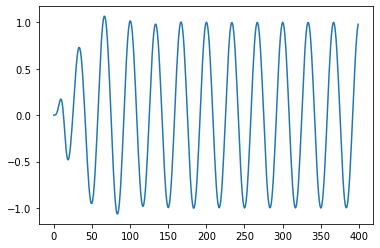

In [61]:
sos = signal.butter(5, band, 'bandpass', fs=rate, output='sos')
filtered = signal.sosfilt(sos, x)
plt.plot(filtered)

[5_FIR_Filters](5_FIR_Filters.ipynb)<img src="data\images\Forward_Backward.png" align='middle'>[5_ImgProc_Intro](5_ImgProc_Intro.ipynb)